In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn


In [1]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload files manually


Saving item.csv to item.csv


In [2]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload files manually


Saving promotion.csv to promotion.csv


In [3]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload files manually


Saving sales.csv to sales.csv


In [4]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload files manually


Saving supermarkets.csv to supermarkets.csv


In [ ]:
import os
print(os.listdir())


['.config', 'promotion.csv', 'sales.csv', 'item.csv', 'supermarkets.csv', 'sample_data']


In [ ]:
import os
print(os.listdir())


In [ ]:
print(sales_df.columns)
print(promotion_df.columns)
print(items_df.columns)
print(supermarkets_df.columns)



Index(['code', 'amount', 'units', 'time', 'province', 'week', 'customerId',
       'supermarket', 'basket', 'day', 'voucher'],
      dtype='object')
Index(['code', 'supermarkets', 'week', 'feature', 'display', 'province'], dtype='object')
Index(['code', 'descrption', 'type', 'brand', 'size'], dtype='object')
Index(['supermarket_No', 'postal-code'], dtype='object')


In [18]:
# Rename columns for consistency
sales_df.rename(columns={"supermarket": "supermarket_No"}, inplace=True)
promotion_df.rename(columns={"supermarkets": "supermarket_No"}, inplace=True)


In [19]:
merged_df = sales_df.merge(promotion_df, on=["code", "supermarket_No"], how="left")
merged_df = merged_df.merge(items_df, on="code", how="left")
merged_df = merged_df.merge(supermarkets_df, on="supermarket_No", how="left")


In [22]:
print("After renaming, sales_df columns:", sales_df.columns)
print("After renaming, promotion_df columns:", promotion_df.columns)


After renaming, sales_df columns: Index(['code', 'amount', 'units', 'time', 'province', 'week', 'customerId',
       'supermarket_No', 'basket', 'day', 'voucher'],
      dtype='object')
After renaming, promotion_df columns: Index(['code', 'supermarket_No', 'week', 'feature', 'display', 'province'], dtype='object')


In [23]:
print("Sales DF Shape:", sales_df.shape)
print("Promotion DF Shape:", promotion_df.shape)


Sales DF Shape: (1048575, 11)
Promotion DF Shape: (351372, 6)


In [24]:
print("Columns in sales_df:", sales_df.columns.tolist())
print("Columns in promotion_df:", promotion_df.columns.tolist())
print("Columns in supermarkets_df:", supermarkets_df.columns.tolist())


Columns in sales_df: ['code', 'amount', 'units', 'time', 'province', 'week', 'customerId', 'supermarket_No', 'basket', 'day', 'voucher']
Columns in promotion_df: ['code', 'supermarket_No', 'week', 'feature', 'display', 'province']
Columns in supermarkets_df: ['supermarket_No', 'postal-code']


In [25]:
# Rename the columns to standardize them
sales_df.rename(columns={"supermarket": "supermarket_No"}, inplace=True)
promotion_df.rename(columns={"supermarkets": "supermarket_No"}, inplace=True)

# Verify column names after renaming
print("After renaming:")
print("Columns in sales_df:", sales_df.columns.tolist())
print("Columns in promotion_df:", promotion_df.columns.tolist())


After renaming:
Columns in sales_df: ['code', 'amount', 'units', 'time', 'province', 'week', 'customerId', 'supermarket_No', 'basket', 'day', 'voucher']
Columns in promotion_df: ['code', 'supermarket_No', 'week', 'feature', 'display', 'province']


In [26]:
# Merge the datasets after renaming columns
merged_df = sales_df.merge(promotion_df, on=["code", "supermarket_No"], how="left")
merged_df = merged_df.merge(items_df, on="code", how="left")
merged_df = merged_df.merge(supermarkets_df, on="supermarket_No", how="left")


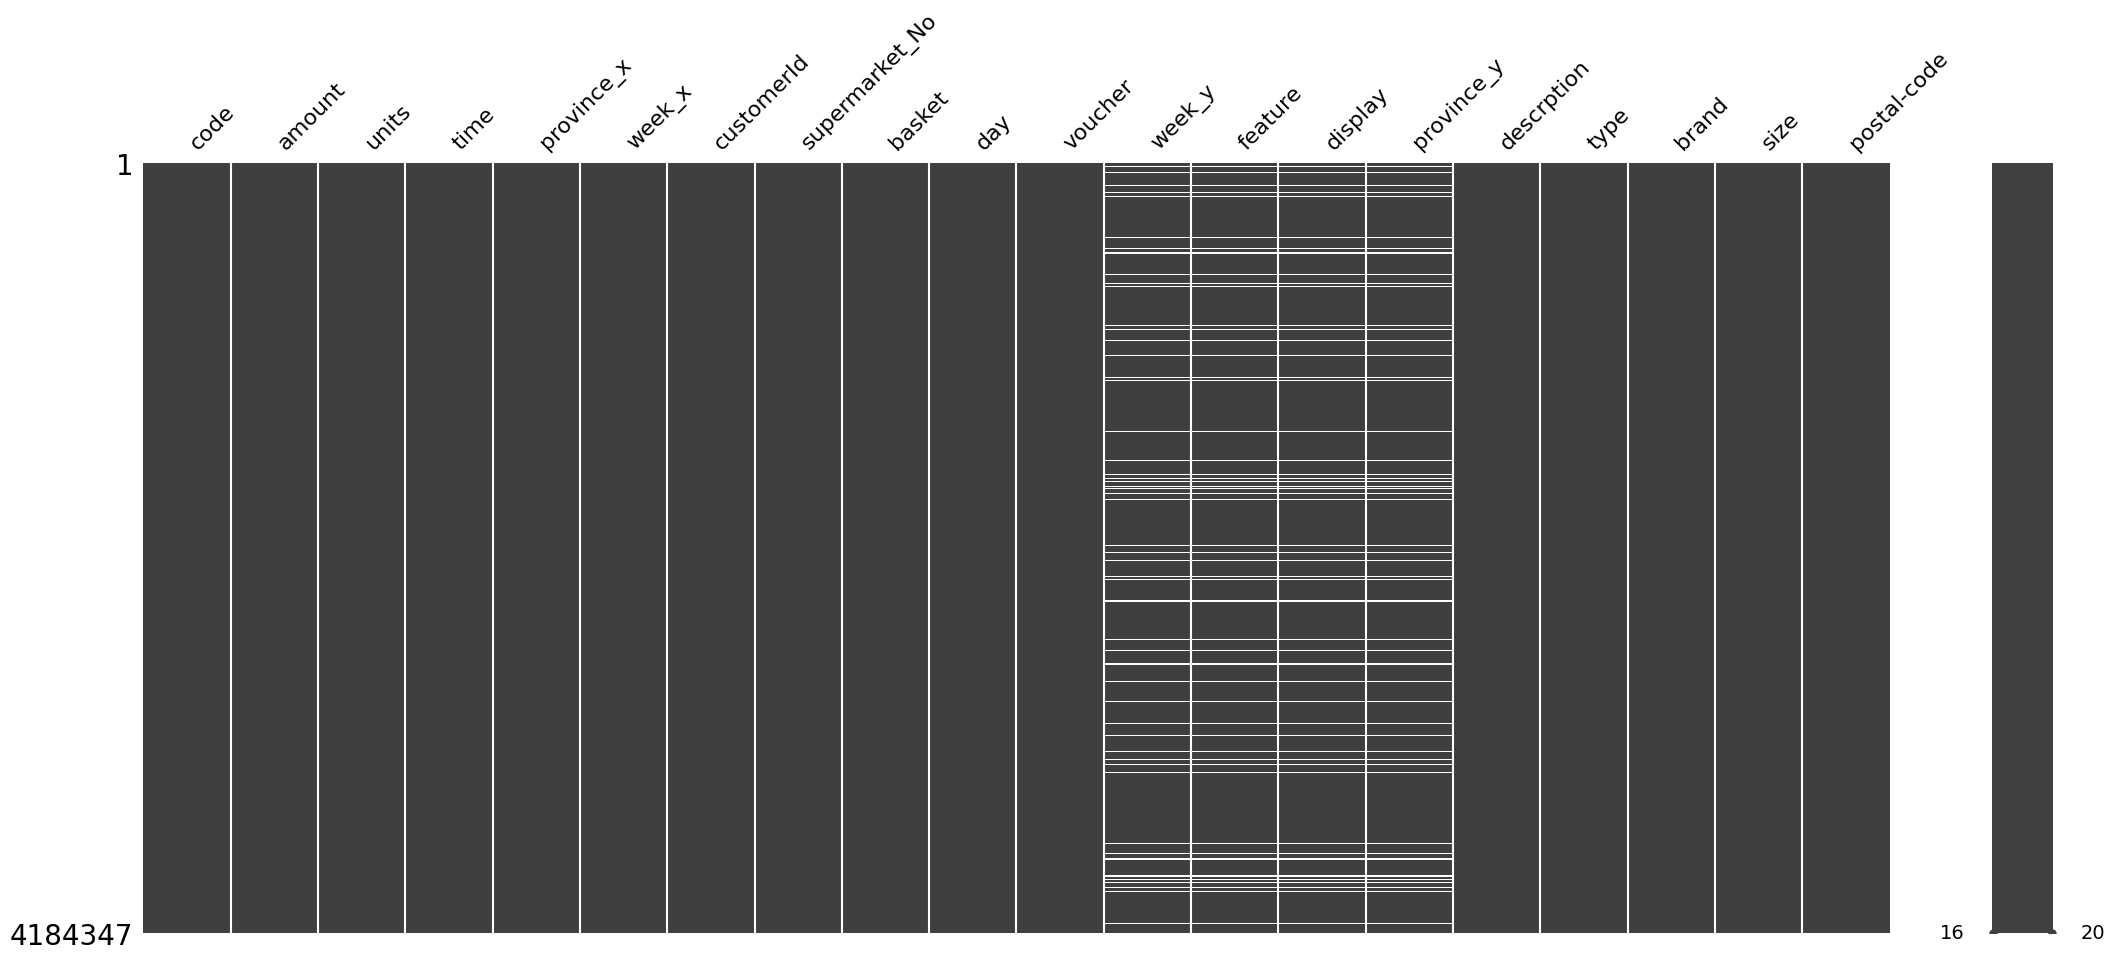

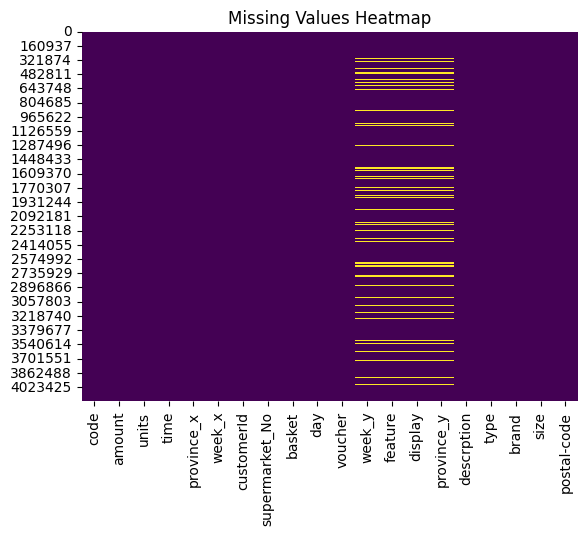

In [27]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values
msno.matrix(merged_df)
plt.show()

# Display heatmap of missing values
sns.heatmap(merged_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [28]:
print(merged_df.describe())  # Summary stats for numerical columns
print(merged_df.info())  # Data types and missing values


               code        amount         units          time    province_x  \
count  4.184347e+06  4.184347e+06  4.184347e+06  4.184347e+06  4.184347e+06   
mean   5.969883e+09  1.730327e+00  1.208677e+00  1.546843e+03  1.490243e+00   
std    3.013908e+09  3.297407e+00  5.827965e-01  3.796226e+02  4.999049e-01   
min    1.111124e+08 -8.280000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
25%    3.620000e+09  9.900000e-01  1.000000e+00  1.303000e+03  1.000000e+00   
50%    4.112908e+09  1.500000e+00  1.000000e+00  1.604000e+03  1.000000e+00   
75%    9.999971e+09  2.000000e+00  1.000000e+00  1.824000e+03  2.000000e+00   
max    9.999986e+09  5.900000e+03  1.000000e+02  2.359000e+03  2.000000e+00   

             week_x    customerId  supermarket_No        basket           day  \
count  4.184347e+06  4.184347e+06    4.184347e+06  4.184347e+06  4.184347e+06   
mean   1.376025e+01  1.934804e+05    2.078967e+02  3.338265e+05  9.322190e+01   
std    8.734081e+00  1.261867e+05    1.122223

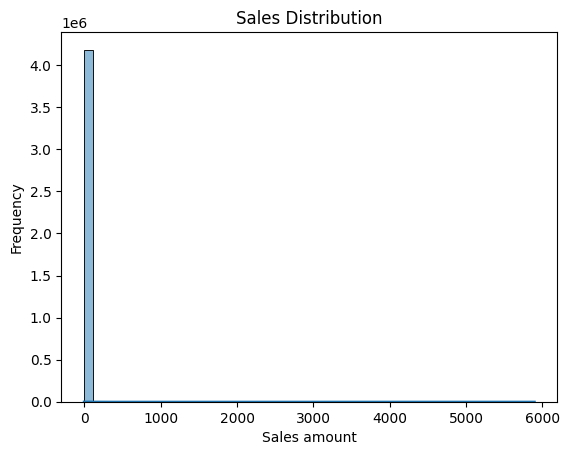

In [29]:
sns.histplot(merged_df["amount"], bins=50, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales amount")
plt.ylabel("Frequency")
plt.show()


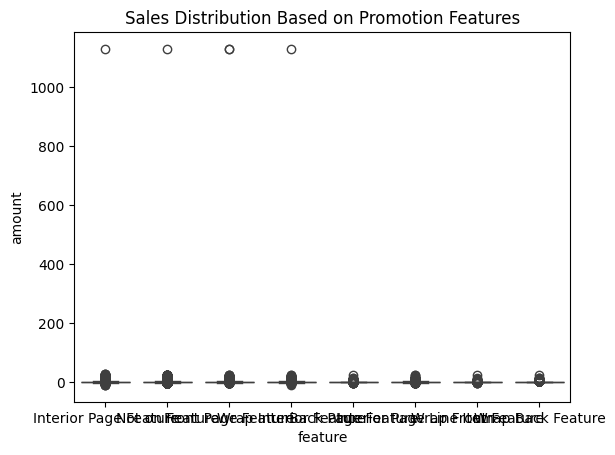

In [30]:
sns.boxplot(x=merged_df["feature"], y=merged_df["amount"])
plt.title("Sales Distribution Based on Promotion Features")
plt.show()


In [31]:
# Check the data types of each column
print(merged_df.dtypes)


code                int64
amount            float64
units               int64
time                int64
province_x          int64
week_x              int64
customerId          int64
supermarket_No      int64
basket              int64
day                 int64
voucher             int64
week_y            float64
feature            object
display            object
province_y        float64
descrption         object
type               object
brand              object
size               object
postal-code         int64
dtype: object


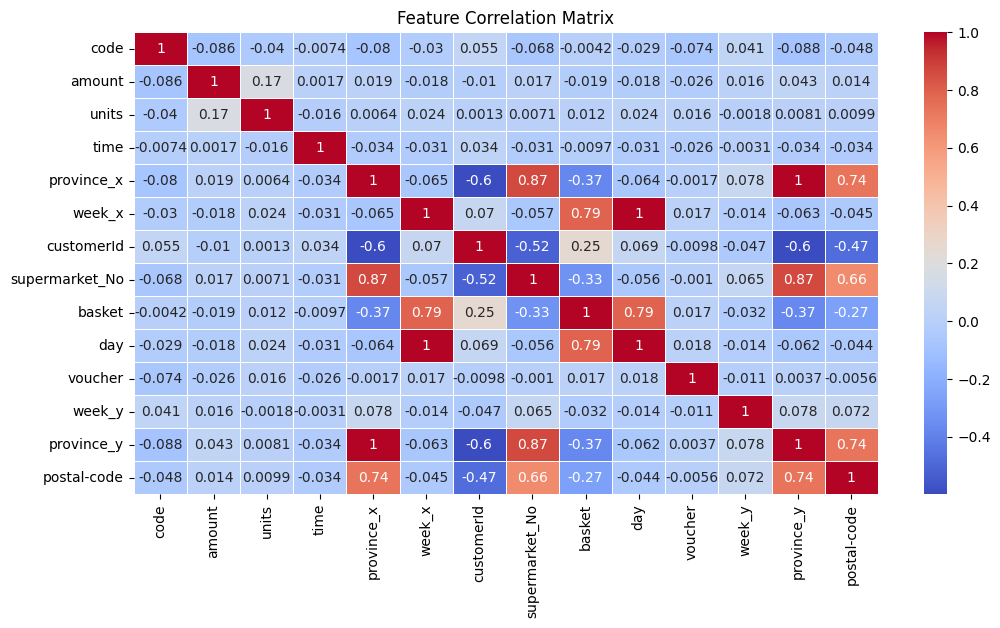

In [32]:
# Select only numeric columns
numeric_cols = merged_df.select_dtypes(include=['number']).columns
numeric_df = merged_df[numeric_cols]

# Now compute the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [33]:
Q1 = merged_df["amount"].quantile(0.25)
Q3 = merged_df["amount"].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
merged_df = merged_df[(merged_df["amount"] >= Q1 - 1.5 * IQR) & (merged_df["amount"] <= Q3 + 1.5 * IQR)]


In [34]:
# List all column names
print(merged_df.columns.tolist())


['code', 'amount', 'units', 'time', 'province_x', 'week_x', 'customerId', 'supermarket_No', 'basket', 'day', 'voucher', 'week_y', 'feature', 'display', 'province_y', 'descrption', 'type', 'brand', 'size', 'postal-code']


In [35]:
# Strip any leading/trailing spaces from column names
merged_df.columns = merged_df.columns.str.strip()

# Now check the columns again
print(merged_df.columns.tolist())


['code', 'amount', 'units', 'time', 'province_x', 'week_x', 'customerId', 'supermarket_No', 'basket', 'day', 'voucher', 'week_y', 'feature', 'display', 'province_y', 'descrption', 'type', 'brand', 'size', 'postal-code']


In [36]:
# Example: Check the first few rows of the 'time' column
print(merged_df['time'].head())


0    1100
1    1100
2    1100
3    1100
4    1100
Name: time, dtype: int64


In [37]:
# Convert 'time' column from int to string, then to datetime format
merged_df['time'] = merged_df['time'].astype(str).str.zfill(4)  # Ensure 4 digits
merged_df['time'] = pd.to_datetime(merged_df['time'], format='%H%M').dt.time

# Check the result
print(merged_df['time'].head())


0    11:00:00
1    11:00:00
2    11:00:00
3    11:00:00
4    11:00:00
Name: time, dtype: object


In [39]:
# Convert time to minutes since midnight
merged_df['time_minutes'] = merged_df['time'].apply(lambda x: x.hour * 60 + x.minute)

# Check the result
print(merged_df[['time', 'time_minutes']].head())


       time  time_minutes
0  11:00:00           660
1  11:00:00           660
2  11:00:00           660
3  11:00:00           660
4  11:00:00           660


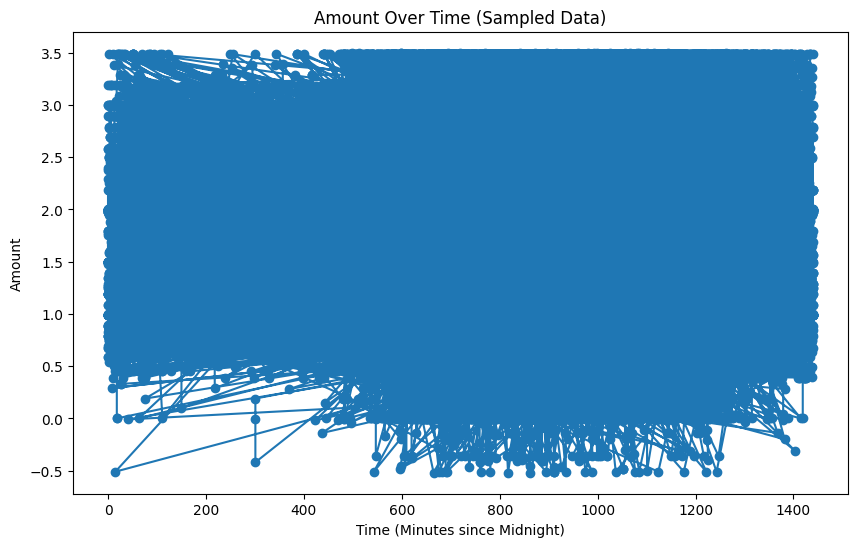

In [40]:
# Sample 1 out of every 10 rows
sampled_df = merged_df.iloc[::10]

# Plot the sampled data
plt.figure(figsize=(10, 6))
plt.plot(sampled_df['time_minutes'], sampled_df['amount'], marker='o')
plt.title('Amount Over Time (Sampled Data)')
plt.xlabel('Time (Minutes since Midnight)')
plt.ylabel('Amount')
plt.show()


In [41]:
# Check which columns are selected or removed before merging
print(merged_df.columns.tolist())


['code', 'amount', 'units', 'time', 'province_x', 'week_x', 'customerId', 'supermarket_No', 'basket', 'day', 'voucher', 'week_y', 'feature', 'display', 'province_y', 'descrption', 'type', 'brand', 'size', 'postal-code', 'time_minutes']


In [42]:
# Inspect other columns that may represent time-related data
print(merged_df[['time', 'day']].head())


       time  day
0  11:00:00    1
1  11:00:00    1
2  11:00:00    1
3  11:00:00    1
4  11:00:00    1


In [43]:
merged_df.rename(columns={'existing_time_column': 'Time of transactions'}, inplace=True)


In [44]:
print(sales_df.columns.tolist())  # Before merging
print(promotion_df.columns.tolist())  # Before merging


['code', 'amount', 'units', 'time', 'province', 'week', 'customerId', 'supermarket_No', 'basket', 'day', 'voucher']
['code', 'supermarket_No', 'week', 'feature', 'display', 'province']


In [45]:
merged_df.columns = merged_df.columns.str.strip().str.lower()
print(merged_df.columns.tolist())  # Verify updated column names


['code', 'amount', 'units', 'time', 'province_x', 'week_x', 'customerid', 'supermarket_no', 'basket', 'day', 'voucher', 'week_y', 'feature', 'display', 'province_y', 'descrption', 'type', 'brand', 'size', 'postal-code', 'time_minutes']


In [46]:
merged_df['time_seconds'] = merged_df['time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)


In [47]:
merged_df.columns = merged_df.columns.str.strip()  # To remove leading/trailing spaces


In [48]:
print(merged_df.columns.tolist())


['code', 'amount', 'units', 'time', 'province_x', 'week_x', 'customerid', 'supermarket_no', 'basket', 'day', 'voucher', 'week_y', 'feature', 'display', 'province_y', 'descrption', 'type', 'brand', 'size', 'postal-code', 'time_minutes', 'time_seconds']


In [49]:
print(merged_df['time'].head())


0    11:00:00
1    11:00:00
2    11:00:00
3    11:00:00
4    11:00:00
Name: time, dtype: object


In [50]:
# Convert 'time' to seconds
merged_df['time_in_seconds'] = merged_df['time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

# Or if you prefer minutes:
merged_df['time_in_minutes'] = merged_df['time'].apply(lambda x: x.hour * 60 + x.minute)


In [51]:
# For example, if you want to create a 'Transaction_Date' column based on the time
# you can convert the time to a timestamp format (or just work with the time_in_seconds column for analysis)

merged_df["Transaction_Date"] = pd.to_datetime(merged_df["time_in_seconds"], unit='s')

# Extracting features
merged_df["Day_of_Week"] = merged_df["Transaction_Date"].dt.dayofweek
merged_df["Month"] = merged_df["Transaction_Date"].dt.month


In [52]:
print(merged_df[['time', 'time_in_seconds', 'Day_of_Week', 'Month']].head())


       time  time_in_seconds  Day_of_Week  Month
0  11:00:00            39600            3      1
1  11:00:00            39600            3      1
2  11:00:00            39600            3      1
3  11:00:00            39600            3      1
4  11:00:00            39600            3      1


In [53]:
merged_df["Hour_of_Day"] = merged_df["Transaction_Date"].dt.hour
merged_df["Is_Weekend"] = merged_df["Day_of_Week"].apply(lambda x: 1 if x >= 5 else 0)  # 0=Weekday, 1=Weekend


In [54]:
merged_df["Week_of_Year"] = merged_df["Transaction_Date"].dt.isocalendar().week


In [55]:
print(merged_df.isnull().sum())


code                     0
amount                   0
units                    0
time                     0
province_x               0
week_x                   0
customerid               0
supermarket_no           0
basket                   0
day                      0
voucher                  0
week_y              313294
feature             313294
display             313294
province_y          313294
descrption               0
type                     0
brand                    0
size                     0
postal-code              0
time_minutes             0
time_seconds             0
time_in_seconds          0
time_in_minutes          0
Transaction_Date         0
Day_of_Week              0
Month                    0
Hour_of_Day              0
Is_Weekend               0
Week_of_Year             0
dtype: int64


In [56]:
non_numeric_cols = merged_df.select_dtypes(include=['object']).columns
print(non_numeric_cols)


Index(['time', 'feature', 'display', 'descrption', 'type', 'brand', 'size'], dtype='object')


In [ ]:
# For categorical columns, you could apply label encoding (if required)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in non_numeric_cols:
    merged_df[col] = encoder.fit_transform(merged_df[col].astype(str))

# Now, try filling missing values again
merged_df.fillna(merged_df.mean(), inplace=True)


In [ ]:
numeric_cols = merged_df.select_dtypes(include=['number']).columns
merged_df[numeric_cols] = merged_df[numeric_cols].fillna(merged_df[numeric_cols].mean())


In [7]:
import pandas as pd

# Load datasets with correct names
items_df = pd.read_csv("item.csv")
sales_df = pd.read_csv("sales.csv")
promotion_df = pd.read_csv("promotion.csv")
supermarkets_df = pd.read_csv("supermarkets.csv")

# Display first few rows
print(items_df.head(), "\n")
print(sales_df.head(), "\n")
print(promotion_df.head(), "\n")
print(supermarkets_df.head(), "\n")


         code                     descrption    type        brand      size
0  3000005040  AUNT JEM ORIGINAL PANCAKE MIX  Type 1  Aunt Jemima      2 LB
1  3000005070      A/JEM COMPLETE PANCAKE MI  Type 1  Aunt Jemima  32    OZ
2  3000005300      AJ BUTTERMILK PANCAKE MIX  Type 1  Aunt Jemima     32 OZ
3  3000005350       A J BTRMLK COMP PNCK MIX  Type 1  Aunt Jemima      1 LB
4  1600015760      BC PANCAKE MIX BUTTERMILK  Type 1     Bisquick   6.75 OZ 

         code  amount  units  time  province  week  customerId  supermarket  \
0  7680850106    0.80      1  1100         2     1      125434          244   
1  3620000470    3.59      1  1100         2     1      125434          244   
2  1800028064    2.25      1  1137         2     1      108320          244   
3  9999985067    0.85      1  1148         2     1      162016          244   
4  9999985131    2.19      1  1323         2     1       89437          244   

   basket  day  voucher  
0       1    1        0  
1       1    1 

In [12]:
print(items_df.isnull().sum())
print(sales_df.isnull().sum())
print(promotion_df.isnull().sum())
print(supermarkets_df.isnull().sum())


code          0
descrption    0
type          0
brand         0
size          0
dtype: int64
code           0
amount         0
units          0
time           0
province       0
week           0
customerId     0
supermarket    0
basket         0
day            0
voucher        0
dtype: int64
code            0
supermarkets    0
week            0
feature         0
display         0
province        0
dtype: int64
supermarket_No    0
postal-code       0
dtype: int64


In [ ]:
sales_df.fillna({'Voucher': 'NoVoucher'}, inplace=True)
sales_df.dropna(inplace=True)  # Drop rows with missing values (optional)


In [ ]:
df = pd.read_csv('item.csv', header=0)
print(df.head())


         code                     descrption    type        brand      size
0  3000005040  AUNT JEM ORIGINAL PANCAKE MIX  Type 1  Aunt Jemima      2 LB
1  3000005070      A/JEM COMPLETE PANCAKE MI  Type 1  Aunt Jemima  32    OZ
2  3000005300      AJ BUTTERMILK PANCAKE MIX  Type 1  Aunt Jemima     32 OZ
3  3000005350       A J BTRMLK COMP PNCK MIX  Type 1  Aunt Jemima      1 LB
4  1600015760      BC PANCAKE MIX BUTTERMILK  Type 1     Bisquick   6.75 OZ


In [11]:
df = pd.read_csv('item.csv', header=0)
print(df.head())


         code                     descrption    type        brand      size
0  3000005040  AUNT JEM ORIGINAL PANCAKE MIX  Type 1  Aunt Jemima      2 LB
1  3000005070      A/JEM COMPLETE PANCAKE MI  Type 1  Aunt Jemima  32    OZ
2  3000005300      AJ BUTTERMILK PANCAKE MIX  Type 1  Aunt Jemima     32 OZ
3  3000005350       A J BTRMLK COMP PNCK MIX  Type 1  Aunt Jemima      1 LB
4  1600015760      BC PANCAKE MIX BUTTERMILK  Type 1     Bisquick   6.75 OZ


In [10]:
df = pd.read_csv('sales.csv', header=0)
print(df.head())


         code  amount  units  time  province  week  customerId  supermarket  \
0  7680850106    0.80      1  1100         2     1      125434          244   
1  3620000470    3.59      1  1100         2     1      125434          244   
2  1800028064    2.25      1  1137         2     1      108320          244   
3  9999985067    0.85      1  1148         2     1      162016          244   
4  9999985131    2.19      1  1323         2     1       89437          244   

   basket  day  voucher  
0       1    1        0  
1       1    1        0  
2       2    1        0  
3       3    1        0  
4       4    1        0  


In [ ]:
df = pd.read_csv('promotion.csv', header=0)
print(df.head())


         code  supermarkets  week                feature            display  \
0  2700042240           285    91         Not on Feature  Mid-Aisle End Cap   
1  2700042292           285    92  Interior Page Feature     Not on Display   
2  2700042274           285    92  Interior Page Feature     Not on Display   
3  2700042273           285    92  Interior Page Feature     Not on Display   
4  2700042254           285    92  Interior Page Feature     Not on Display   

   province  
0         2  
1         2  
2         2  
3         2  
4         2  
